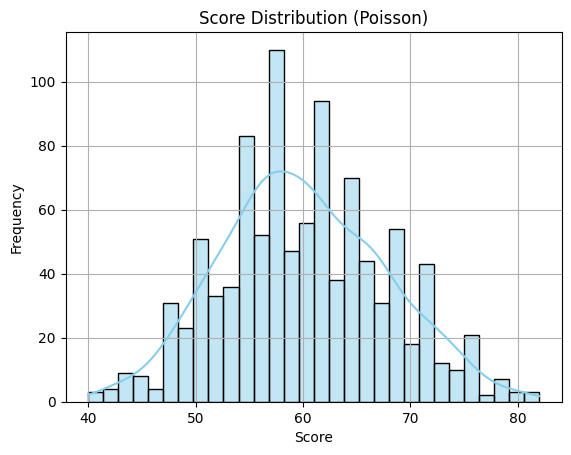

✅ Generated and stored 1000 records using poisson distribution.


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
import random
import string

# MongoDB Setup
client = MongoClient("mongodb://localhost:27017/")
db = client["synthetic_data"]
collection = db["datasets"]

# Helper Functions
def random_name(length=6):
    return ''.join(random.choices(string.ascii_uppercase, k=length))

def generate_dataset(size=1000, distribution="normal"):
    names = [random_name() for _ in range(size)]
    ages = np.random.randint(18, 65, size)

    if distribution == "normal":
        scores = np.random.normal(loc=70, scale=10, size=size)
    elif distribution == "uniform":
        scores = np.random.uniform(low=50, high=100, size=size)
    elif distribution == "binomial":
        scores = np.random.binomial(n=100, p=0.7, size=size)  # fixed typo "socres"
    elif distribution == "poisson":
        scores = np.random.poisson(lam=60, size=size)
    elif distribution == "exponential":
        scores = np.random.exponential(scale=30, size=size)
    else:
        scores = np.random.normal(loc=70, scale=10, size=size)  # Default fallback

    data = []
    for i in range(size):
        record = {
            "name": names[i],
            "age": int(ages[i]),
            "score": round(float(scores[i]), 2),
            "distribution": distribution
        }
        data.append(record)
    return data, scores

def store_to_mongodb(dataset):
    collection.insert_many(dataset)

def visualize_scores(scores, distribution):
    sns.histplot(scores, kde=True, bins=30, color="skyblue")
    plt.title(f"Score Distribution ({distribution.capitalize()})")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Run the Generator
if __name__ == "__main__":
    size = 1000
    distribution = "poisson"

    dataset, scores = generate_dataset(size=size, distribution=distribution)
    store_to_mongodb(dataset)
    visualize_scores(scores, distribution)
    print(f"✅ Generated and stored {size} records using {distribution} distribution.")
